In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [2]:
df=pd.read_csv('/Users/parmikenia/Desktop/internship codes/validation dataset2.csv')

X = df.drop(columns=['Customer_ID','Credit_Score'])
y = df['Credit_Score']


In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA for dimensionality reduction
# Set n_components to the number of components you want after reduction
pca = PCA(n_components=5)  # Example: reduce to 5 components
X_pca = pca.fit_transform(X_scaled)

# Step 3: Train KNN on the transformed data
knn_model = KNeighborsRegressor(n_neighbors=5)  # Set n_neighbors based on your data
knn_model.fit(X_pca, y.ravel())

# Step 4: Make predictions on the same data (or a new dataset if desired)
y_pred = knn_model.predict(X_pca)

# Print or analyze results as needed
print("Predictions:", y_pred)

Predictions: [0.6        0.54485981 0.70280374 0.60654206 0.4411215  0.70280374
 0.63364486 0.67570093 0.70280374]


/var/folders/p7/dcp99w1j7s54fyr0zp3ts93c0000gn/T/ipykernel_3023/341203342.py:11: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  knn_model.fit(X_pca, y.ravel())


In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import RFE

# Step 7: Calculate MSE, RMSE, and MAE
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)

# Output the results

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 0.09827282343921354
Root Mean Squared Error (RMSE): 0.3134849652522646
Mean Absolute Error (MAE): 0.27881619937694707


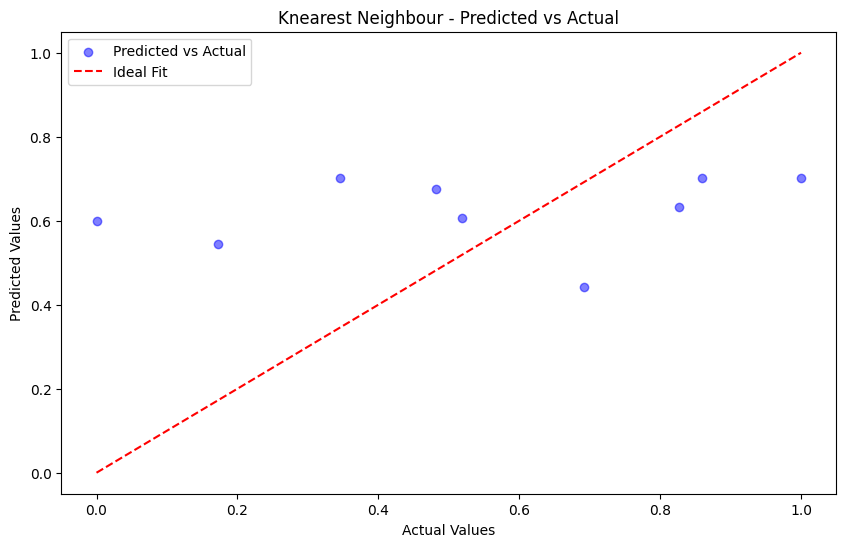

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 6: Plot Regression Line (Actual vs Predicted)
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color="blue", alpha=0.5, label="Predicted vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--", label="Ideal Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Knearest Neighbour - Predicted vs Actual")
plt.legend()
plt.show()
